## 随机过程举例

### 博彩过程的代码模拟

In [37]:
import pandas as pd
import random


sample_list = []
round_num = 100
person_num = 10

for person in range(1, person_num + 1):
    money = 10
    for round_count in range(1, round_num + 1):
        result = random.randint(0, 1)  # 返回0,1之间的随机整数
        if result == 1:
            money += 1
        elif result == 0:
            money -= 1
        if money == 0:
            break
    sample_list.append([person, round_count, money])

sample_df = pd.DataFrame(sample_list, columns=['person', 'round', 'money'])
# 这里是把person列作为这个df的rownames，inplace=True参数能够直接进行修改，不然就要创建新pd进行修改
sample_df.set_index('person', inplace=True)
print(sample_df)


        round  money
person              
1         100     26
2         100     18
3          66      0
4         100     12
5         100     18
6         100     22
7          28      0
8         100     18
9         100     14
10        100     16


In [38]:
import pandas as pd
import random


sample_list = []
round_num = 1000
person_num = 100000

for person in range(1, person_num + 1):
    money = 10
    for round_count in range(1, round_num + 1):
        result = random.randint(0, 1)  # 返回0,1之间的随机整数
        if result == 1:
            money += 1
        elif result == 0:
            money -= 1
        if money == 0:
            break
    sample_list.append([person, round_count, money])

sample_df = pd.DataFrame(sample_list, columns=['person', 'round', 'money'])
sample_df.set_index('person', inplace=True)

quit_num = person_num - len(sample_df[sample_df['round'] == round_num])
earn_num = len(sample_df[sample_df['money'] > 10])
lose_num = len(sample_df[sample_df['round'] == round_num]) - earn_num

print('总轮数{}，总人数{}'.format(round_num, person_num))
print('输光提前出场的人数{}'.format(quit_num))
print('赚钱的人数{}'.format(earn_num))
print('输钱的人数{}'.format(lose_num))


总轮数1000，总人数100000
输光提前出场的人数75285
赚钱的人数23344
输钱的人数1371


### 股票涨跌的模拟

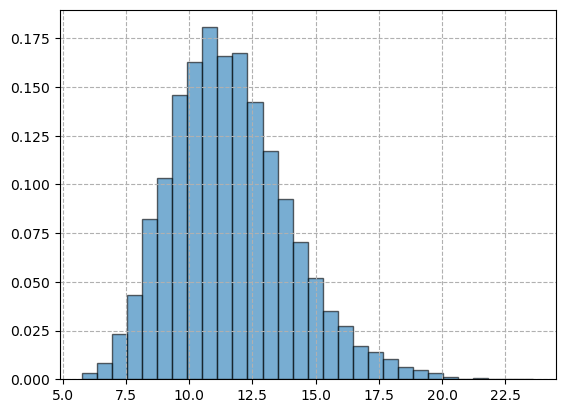

In [39]:
import random
import scipy
import matplotlib.pyplot as plt
from numpy.lib.scimath import sqrt


s0 = 10
T = 1
n = 244 * T
dt = T / n
mu = 0.15
sigma = 0.2
n_simulation = 10000
sT = []

for i in range(n_simulation):
    st = s0
    for i in range(int(n)):
        e = random.normalvariate(0, 1)  # 产生服从标准正态分布的一个随机变量
        st = st + mu * st * dt + sigma * st * e * sqrt(dt)
    sT.append(st)

plt.hist(sT, alpha=0.6, bins=30, density=True, edgecolor='k')
plt.grid(ls='--')
plt.show()


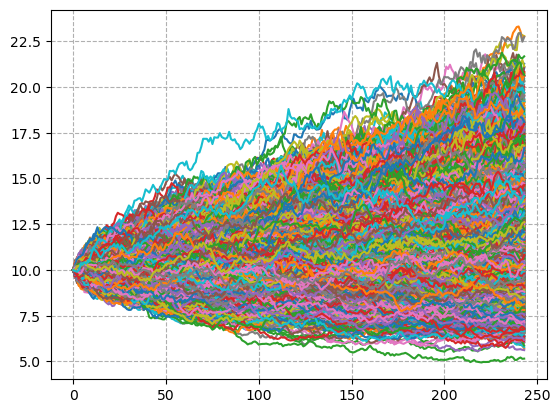

In [40]:
import random
import scipy
import matplotlib.pyplot as plt
from numpy.lib.scimath import sqrt
import numpy as np


s0 = 10
T = 1
n = 244 * T
dt = T / n
mu = 0.15
sigma = 0.2
n_simulation = 10000
random_series = np.zeros(int(n), dtype=float)
# 注意这里储存不同时间点数据的做法，很巧妙

for i in range(n_simulation):
    random_series[0] = s0
    for j in range(1, int(n)):
        e = random.normalvariate(0, 1)
        random_series[j] = random_series[j-1] + mu * random_series[j -
                                                                   1] * dt + sigma * random_series[j-1] * e * sqrt(dt)

    plt.plot(range(0, int(n)), random_series)

plt.grid(ls='--')
plt.show()


## 马尔可夫链

### 两步到达的矩阵表示

In [41]:
import numpy as np


A = np.array([[0.7, 0.2, 0.1],
             [0.3, 0.5, 0.2],
             [0.2, 0.4, 0.4]])

print(np.dot(A, A))
print(A@A)  # 这上面其实是点乘的意思，但是如果是多维矩阵，那也会变成矩阵乘法。所以numpy官方文档里面推荐用A@A
# 如果两个变量都是常数或者是向量，那就直接是点乘了
# help(np.dot)


[[0.57 0.28 0.15]
 [0.4  0.39 0.21]
 [0.34 0.4  0.26]]
[[0.57 0.28 0.15]
 [0.4  0.39 0.21]
 [0.34 0.4  0.26]]


### 多步到达的矩阵指数幂表示

In [42]:
import numpy as np


A = np.array([[0.7, 0.2, 0.1],
             [0.3, 0.5, 0.2],
             [0.2, 0.4, 0.4]])


def get_matrix_pow(matrix, n):
    repeat = matrix
    for i in range(int(n)):
        repeat = np.dot(repeat, matrix)
    print(repeat)


get_matrix_pow(A, 2)
get_matrix_pow(A, 5)
get_matrix_pow(A, 10)
get_matrix_pow(A, 200)
get_matrix_pow(A, 1000)

# 马尔可夫链收敛了


[[0.513 0.314 0.173]
 [0.439 0.359 0.202]
 [0.41  0.372 0.218]]
[[0.471945 0.338164 0.189891]
 [0.465628 0.341871 0.192501]
 [0.463018 0.343384 0.193598]]
[[0.46814979 0.34038764 0.19146257]
 [0.46804396 0.34044963 0.1915064 ]
 [0.46800013 0.34047531 0.19152456]]
[[0.46808511 0.34042553 0.19148936]
 [0.46808511 0.34042553 0.19148936]
 [0.46808511 0.34042553 0.19148936]]
[[0.46808511 0.34042553 0.19148936]
 [0.46808511 0.34042553 0.19148936]
 [0.46808511 0.34042553 0.19148936]]


### 与初始态相关的收敛矩阵

In [43]:
import numpy as np


A = np.array([[1, 0, 0, 0],
             [0.2, 0.4, 0.4, 0],
             [0, 0.4, 0.4, 0.2],
             [0, 0, 0, 1]])


def get_matrix_pow(matrix, n):
    repeat = matrix
    for i in range(int(n)):
        repeat = np.dot(repeat, matrix)
    print(repeat)


get_matrix_pow(A, 2)
get_matrix_pow(A, 5)
get_matrix_pow(A, 10)
get_matrix_pow(A, 200)
get_matrix_pow(A, 1000)

# 马尔可夫链收敛了，但是可以发现每一行并不相同，所以收敛态和初始态是相关的


[[1.    0.    0.    0.   ]
 [0.344 0.256 0.256 0.144]
 [0.144 0.256 0.256 0.344]
 [0.    0.    0.    1.   ]]
[[1.       0.       0.       0.      ]
 [0.468928 0.131072 0.131072 0.268928]
 [0.268928 0.131072 0.131072 0.468928]
 [0.       0.       0.       1.      ]]
[[1.         0.         0.         0.        ]
 [0.55705033 0.04294967 0.04294967 0.35705033]
 [0.35705033 0.04294967 0.04294967 0.55705033]
 [0.         0.         0.         1.        ]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.00000000e-01 1.65980623e-20 1.65980623e-20 4.00000000e-01]
 [4.00000000e-01 1.65980623e-20 1.65980623e-20 6.00000000e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.00000000e-01 4.92092769e-98 4.92092769e-98 4.00000000e-01]
 [4.00000000e-01 4.92092769e-98 4.92092769e-98 6.00000000e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]]


### 用前向概率算法来计算HMM模型中的观测概率

In [44]:
import numpy as np
from hmmlearn import hmm


# 隐状态集合Q
states = ['box1', 'box2', 'box3']
# 观测集合V
Ob = ['black', 'white']
# 初始概率pi
start_P = np.array([0.3, 0.5, 0.2])
# 转移矩阵A
translation_P = np.array([
    [0.4, 0.4, 0.2],
    [0.3, 0.2, 0.5],
    [0.2, 0.6, 0.2]
])
# 观测矩阵B
Ob_P = np.array([
    [0.2, 0.8],
    [0.6, 0.4],
    [0.4, 0.6]
])

# help(hmm.MultinomialHMM)
model = hmm.CategoricalHMM(n_components=len(states), init_params='ste', verbose=True)
model.startprob_ = start_P
model.transmat_ = translation_P
model.emissionprob_ = Ob_P
# 这里这个传参方法，是因为Python在查找参数的时候，存在一个向上原则，先从对象内部找，如果没用则从类的内部找（如果这是个类的实例对象的话）
# 一般可以在类里面设置类属性，类属性是用来描述一个类自身的属性的，跟对象的性质完全没有关联
# 访问类属性，可以用类名.类属性的方法来访问
# 而在这里，如果用类属性显然不合适，因为初始概率、转移矩阵这些显然是具体某个HMM模型具有的属性
# 所以就用对象名.类属性的方法来给属性赋值，注意这种赋值方法只会给实例对象附上一个属性，并不影响类自身的属性，也就是不会对类造成影响
# 可以看下面cell的示例

Ob_result = np.array([0, 1, 0])
print(np.exp(model.score(Ob_result.reshape(-1, 1))))

new_model = hmm.CategoricalHMM(n_components=len(states), init_params='ste', verbose=True)
new_model.fit(Ob_result.reshape(-1, 1))
new_model.startprob_
# hmmlearn更新了，因为这里是个分类问题，所以一定要选CategoricalHMM这个模型......不能选MultinomialHMM
# Multinomial是多项分布的意思，但是这里是个二分类问题
# 在这篇文章里面，其实讲的很清楚
# https://hmmlearn.readthedocs.io/en/stable/auto_examples/plot_multinomial_hmm.html

Fitting a model with 11 free scalar parameters with only 3 data points will result in a degenerate solution.


0.11292799999999999


         1      -1.45401056             +nan
         2      -0.29811709      +1.15589347
         3      -0.07933295      +0.21878414
         4      -0.02587252      +0.05346043
         5      -0.00969294      +0.01617958
         6      -0.00366599      +0.00602696


array([1.58618423e-77, 1.16915093e-07, 9.99999883e-01])

In [45]:
# class attr sample

class attr_test:

    n = 20001226
    x = 19761212

a = attr_test()
a.x = 19750430

print(attr_test.n)
print(a.x)
print(attr_test.x)

# 可以发现，attr_test.x和a.x是不一样的值

20001226
19750430
19761212


### 多项分布的MultinomialHMM模型的构造

In [46]:
import numpy as np
from hmmlearn import hmm

# For this example, we will model the stages of a conversation,
# where each sentence is "generated" with an underlying topic, "cat" or "dog"
states = ["cat", "dog"]
id2topic = dict(zip(range(len(states)), states))
# we are more likely to talk about cats first
start_probs = np.array([0.6, 0.4])

# For each topic, the probability of saying certain words can be modeled by
# a distribution over vocabulary associated with the categories

vocabulary = ["tail", "fetch", "mouse", "food"]
# if the topic is "cat", we are more likely to talk about "mouse"
# if the topic is "dog", we are more likely to talk about "fetch"
emission_probs = np.array([[0.25, 0.1, 0.4, 0.25],
                           [0.2, 0.5, 0.1, 0.2]])

# Also assume it's more likely to stay in a state than transition to the other
trans_mat = np.array([[0.8, 0.2], [0.2, 0.8]])


# Pretend that every sentence we speak only has a total of 5 words,
# i.e. we independently utter a word from the vocabulary 5 times per sentence
# we observe the following bag of words (BoW) for 8 sentences:
observations = [["tail", "mouse", "mouse", "food", "mouse"],
        ["food", "mouse", "mouse", "food", "mouse"],
        ["tail", "mouse", "mouse", "tail", "mouse"],
        ["food", "mouse", "food", "food", "tail"],
        ["tail", "fetch", "mouse", "food", "tail"],
        ["tail", "fetch", "fetch", "food", "fetch"],
        ["fetch", "fetch", "fetch", "food", "tail"],
        ["food", "mouse", "food", "food", "tail"],
        ["tail", "mouse", "mouse", "tail", "mouse"],
        ["fetch", "fetch", "fetch", "fetch", "fetch"]]

# 注意这里的数据处理方法以及下面的模型构造方法
# 要注意理解HMM模型中trails和samples的含义及其差别

# Convert "sentences" to numbers:
vocab2id = dict(zip(vocabulary, range(len(vocabulary))))
def sentence2counts(sentence):
    ans = []
    for word, idx in vocab2id.items():
        count = sentence.count(word)
        ans.append(count)
    return ans

X = []
for sentence in observations:
    row = sentence2counts(sentence)
    X.append(row)

data = np.array(X, dtype=int)

# pretend this is repeated, so we have more data to learn from:
lengths = [len(X)]*5
sequences = np.tile(data, (5,1))


# Set up model:
model = hmm.MultinomialHMM(n_components=len(states),
        n_trials=len(observations[0]),
        n_iter=50,
        init_params='')

# 这里可以发现，init_params设置为了空，但是下面还是对参数进行了更新，这是因为params仍然是ste
# params='ste', init_params='ste'
# 所以在这里其实发生的是，对先验参数的EM迭代，最终得到更加符合观测数据的HMM模型以及ste三大参数

model.n_features = len(vocabulary)
model.startprob_ = start_probs
model.transmat_ = trans_mat
model.emissionprob_ = emission_probs
model.fit(sequences, lengths)
logprob, received = model.decode(sequences)

print("Topics discussed:")
print([id2topic[x] for x in received])

print("Learned emission probs:")
print(model.emissionprob_)

print("Learned transition matrix:")
print(model.transmat_)

# fit这个函数其实是利用观测数据，用魔改的EM算法来预测参数（转移矩阵、初始概率、观测概率矩阵）
# 模型构造时候的init_params这个属性，只对fit起作用，这个参数和params是类似的东西
# init_params表示的是在进行fit的时候，EM之前是否对上述三个参数（转移矩阵、初始概率、观测概率矩阵）进行初始化，ste代表全部初始化，如果全部选择初始化，那就可以完全不设定初始参数然后就开始进行拟合
# params则是大同小异，表示在训练的过程中要不要对给的初始参数进行更新，ste就表示在过程中全部给更新了
# 如果设置了ste的话，训练（fit）完的模型就跟你的初始参数没关系了，是从训练数据集X中通过EM法来得到的新参数
# 如果是像上面的例子一样，已经知道ste三个参数和观测矩阵，想算出概率或者是解码出隐状态，那么是不需要init_params/params这个参数的，因为直接是计算过程，不包括参数估计（其实和手算完全一样）
# 所以看到这个例子里面最下面，设置完ste以后，可以完全不传入先验参数就进行EM的fit，因为会直接自动设置一个先验参数

# Try to reset and refit:
new_model = hmm.MultinomialHMM(n_components=len(states),
        n_trials=len(observations[0]),
        n_iter=50, init_params='ste')

new_model.fit(sequences, lengths)
logprob, received = new_model.decode(sequences)

print("\nNew Model")
print("Topics discussed:")
print([id2topic[x] for x in received])

print("Learned emission probs:")
print(new_model.emissionprob_)

print("Learned transition matrix:")
print(new_model.transmat_)

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Topics discussed:
['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog']
Learned emission probs:
[[2.57129200e-01 2.86190571e-02 4.28541642e-01 2.85710101e-01]
 [1.33352852e-01 7.33292496e-01 2.67548571e-05 1.33327897e-01]]
Learned transition matrix:
[[0.71429762 0.28570238]
 [0.50007593 0.49992407]]

New Model
Topics discussed:
['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog']
Learned emission probs

### 用维特比算法来解码HMM模型中的隐状态序列

In [47]:
import numpy as np
from hmmlearn import hmm


# 隐状态集合Q
states = ['box1', 'box2', 'box3']
# 观测集合V
Ob = ['black', 'white']
# 初始概率pi
start_P = np.array([0.3, 0.5, 0.2])
# 转移矩阵A
translation_P = np.array([
    [0.4, 0.4, 0.2],
    [0.3, 0.2, 0.5],
    [0.2, 0.6, 0.2]
])
# 观测矩阵B
Ob_P = np.array([
    [0.2, 0.8],
    [0.6, 0.4],
    [0.4, 0.6]
])

# help(hmm.MultinomialHMM)
model = hmm.CategoricalHMM(n_components=len(states), init_params='ste', verbose=True)
model.startprob_ = start_P
model.transmat_ = translation_P
model.emissionprob_ = Ob_P

Ob_result = np.array([0, 1, 0])

# 和求该观测结果概率一样的方法
# 和手算viterbi算法一样，返回两个值，一个是隐序列，另一个就是算出来的最大路径概率
print(model.decode(Ob_result.reshape(-1, 1), algorithm='viterbi')[1])
print(np.exp(model.decode(Ob_result.reshape(-1, 1), algorithm='viterbi')[0]))


[1 2 1]
0.03240000000000002


## 连续域上的无限维——高斯过程

### 高斯过程最常用的核函数（协方差函数）——径向基函数

In [48]:
import numpy as np


def gaussian_kernel(x1, x2, l=1.0, sigma=1.0):
    m, n = x1.shape[0], x2.shape[0]
    dist_martrix = np.zeros((m, n), dtype=float)
    for i in range(m):
        for j in range(n):
            dist_martrix[i][j] = (x1[i] - x2[j]) ** 2
    
    return (sigma ** 2 *np.exp(-0.5 / 1 ** 2 * dist_martrix))

# 这里输入的X是一个时间序列，t分别等于1379四个数字，要注意的是，按照RBF函数的定义式
# (s-t)**2里面的st这两个参数就是时间点，所以计算的其实是时间的距离长短
train_X = np.array([1, 3, 7, 9]).reshape(-1, 1)
print(gaussian_kernel(train_X, train_X))

[[1.00000000e+00 1.35335283e-01 1.52299797e-08 1.26641655e-14]
 [1.35335283e-01 1.00000000e+00 3.35462628e-04 1.52299797e-08]
 [1.52299797e-08 3.35462628e-04 1.00000000e+00 1.35335283e-01]
 [1.26641655e-14 1.52299797e-08 1.35335283e-01 1.00000000e+00]]


### 通过先验参数与观测值求后验参数的高斯过程回归

#### 没搞懂（20230813），先存个档

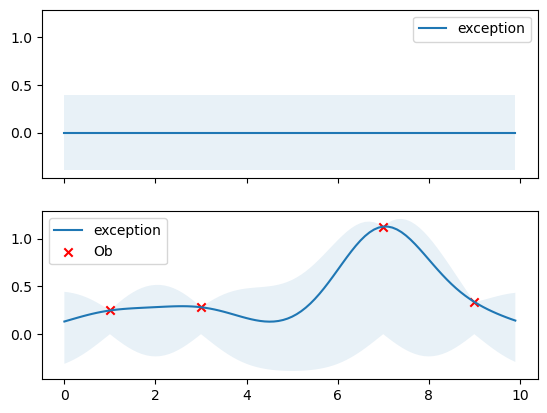

In [49]:
import numpy as np
import matplotlib.pyplot as plt


# 首先和上面一样，定义一个高斯核函数
# 我们的观测点是[1, 3, 7, 9]这四个时间点，观测取值为了方便直接用一个公式取
def gaussian_kernel(x1, x2, l=0.5, sigma=0.2):
    m, n = x1.shape[0], x2.shape[0]
    dist_martrix = np.zeros((m, n), dtype=float)
    for i in range(m):
        for j in range(n):
            dist_martrix[i][j] = (x1[i] - x2[j]) ** 2
    
    return (sigma ** 2 *np.exp(-0.5 / 1 ** 2 * dist_martrix))


def get_Y(X):
    X = np.asarray(X)
    Y = np.sin(X) + np.random.normal(0, 0.5, size=X.shape)
    
    return Y.tolist()
# 这里上面说过了，只是为了随便取个值


# star具体看公式，就是用来算后验参数的那个方法里面提出来的
# 这里面奇奇怪怪的参数都是求后验里面的
def updates(X, X_star, mu_X):
    X = np.asarray(X)
    X_star = np.asarray(X_star)
    K_YY = gaussian_kernel(X, X)
    K_ff = gaussian_kernel(X_star, X_star)
    K_Yf = gaussian_kernel(X, X_star)
    K_fY = K_Yf.T # 协方差矩阵对称
    
    K_YY_inv = np.linalg.inv(K_YY + (1e-8 * np.eye(len(X)))) # 这里应该是为了满足求逆运算的要求
    
    mu_star = K_fY.dot(K_YY_inv).dot(Y - mu_X) # 这里应该还有一个mu_x_star的，但是因为近似处理，把这个省略掉了
    cov_star = K_ff - K_fY.dot(K_YY_inv).dot(K_Yf)
    return mu_star, cov_star


f, ax = plt.subplots(2, 1, sharex=True, sharey=True)
# 画先验参数的图
X_pre = np.arange(0, 10, 0.1)
mu_pre = np.array([0] * len(X_pre))
Y_pre = mu_pre
cov_pre = gaussian_kernel(X_pre, X_pre)
uncerntainty = 1.96 * np.sqrt(np.diag(cov_pre))
ax[0].fill_between(X_pre, Y_pre + uncerntainty, Y_pre - uncerntainty, alpha=0.1)
ax[0].plot(X_pre, Y_pre, label='exception')
ax[0].legend()

# 画基于观测值的高斯过程后验
X = np.array([1, 3, 7, 9]).reshape(-1, 1)
Y = get_Y(X)
X_star = np.arange(0, 10, 0.1).reshape(-1, 1)
mu_star, cov_star = updates(X, X_star, np.array([0, 0, 0, 0]).reshape(-1, 1))
Y_star = mu_star.ravel()  
uncerntainty = 1.96 * np.sqrt(np.diag(cov_star))

ax[1].fill_between(X_star.ravel(), Y_star + uncerntainty, Y_pre - uncerntainty, alpha=0.1)
ax[1].plot(X_star, Y_star, label='exception')
ax[1].scatter(X, Y, label='Ob', c='red', marker='x')
ax[1].legend()

#### 知乎上一个高斯回归器的实现

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 简约版
# __init__(self, num_x_samples)：初始化方法，参数 num_x_samples 指定了 x 轴上采样点的数量，
# 将生成一个等间距的样本点序列 self.x_samples 以及对应的先验分布 self.mu 和协方差矩阵 self.cov。

# update(self, observations)：更新方法，参数 observations 是一个字典，包含新的观测值 x 和 y，
# 将利用已有的先验分布和观测值，计算新的后验分布，并更新 self.mu 和 self.cov。

# visualize(self, num_gp_samples=3)：可视化方法，参数 num_gp_samples 指定了要从后验分布中采样的样本数量，默认为 3，
# 将绘制出先验分布、后验分布以及采样样本的图像。

# update_observation(self, observations)：私有方法，用于更新观测值，将观测值添加到 self.observations 字典中。

# kernel(x1, x2, l=0.5, sigma_f=0.2)：静态方法，实现高斯核函数，计算输入的 x1 和 x2 之间的协方差矩阵，
# 其中参数 l 和 sigma_f 是核函数的超参数，可以通过调整它们来控制核函数的平滑程度和振幅。

# 该类的核心是在 update 方法中，通过利用先验分布和观测值，计算后验分布的均值 self.mu 和协方差矩阵 self.cov，实现了高斯过程回归。
# 在 visualize 方法中，通过绘制先验分布、后验分布和采样样本，直观地展示了高斯过程回归的效果。

# ～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～～


# 详细版
# __init__(self, num_x_samples)：定义一个初始化方法 __init__，该方法接受一个参数 num_x_samples，并设置类的一些初始值。
# 其中 observations 是一个字典，用于记录观测数据，包括 x 和 y，这里初始化为空列表。
# num_x_samples 是指生成用于高斯过程的采样点的数量，这里设为类的属性。
# x_samples 是一个 num_x_samples 行 1 列的数组，每个元素的值在 0 和 10 之间，步长为 10.0 / self.num_x_samples，用于生成采样点。
# mu 和 cov 是高斯过程的先验均值和协方差矩阵，这里先将 mu 初始化为与 x_samples 相同大小的全零数组，cov 则调用 kernel 方法计算。


# update(self, observations)：定义一个方法 update，该方法接受一个字典类型的参数 observations，
# 该参数包含新的观测数据，包括 x 和 y。该方法会调用 update_observation 方法更新观测数据。
# 然后从 self.observations 中取出观测数据 x 和 y，并分别转换为二维数组 x 和 y。
# 接下来，根据高斯过程的公式，计算先验均值和协方差矩阵。其中 K11 是 cov，是已知采样点之间的协方差矩阵，而 K22 是新的观测点之间的协方差
# K21：计算测试点和训练点之间的距离矩阵，大小为 (k,N)。
# K22_inv：计算 K22 的逆矩阵。为了避免在计算逆矩阵时出现奇异矩阵，加上了一个小的偏置 1e-8。该操作是计算高斯过程时的一个重要步骤。
# self.mu：计算高斯过程的均值，即根据先验和观测数据估计函数的值。计算过程为先计算 $K_{12} K_{22}^{-1}$，再乘以观测数据的标签 $y$。最终的均值为一个 (N,1) 的列向量。
# self.cov：计算高斯过程的协方差矩阵，即根据先验和观测数据估计函数值的不确定性。计算过程为先计算 $K_{12} K_{22}^{-1} K_{21}$，再用先验协方差矩阵减去结果。最终的协方差矩阵大小为 (N,N)。


# visualize(self, num_gp_samples=3)：可视化高斯过程的均值和方差，以及从高斯过程中采样的样本。
# 其中，num_gp_samples 表示从高斯过程中采样的样本数量。
# gp_samples = np.random.multivariate_normal(mean=self.mu.ravel(), cov=self.cov, size=num_gp_samples)：从高斯分布中采样，得到多个样本。其中，均值为高斯过程的均值，协方差矩阵为高斯过程的协方差矩阵，大小为 (N,N)，样本数量为 num_gp_samples。
# x_sample = self.x_samples.ravel(): 将采样点展平为一维数组，用于可视化。
# mu = self.mu.ravel(): 将高斯过程的均值展平为一维数组，用于可视化。
# uncertainty = 1.96 * np.sqrt(np.diag(self.cov)): 计算高斯过程的方差，其中 1.96 是统计学中的常数，用于计算 95% 置信区间。最终的方差为一个 (N,) 的行向量，通过 np.diag 取出对角线元素得到。
# plt.fill_between(x_sample, mu + uncertainty, mu - uncertainty, alpha=0.1): 用灰色填充表示高斯过程的


# update_observation(self, observations)：将新观测值添加到observations字典中。
# 如果新观测值的"x"值已经存在于observations中，则更新相应的"y"值；否则，将新的"x"和"y"值添加到observations中。


# kernel(x1, x2, l=0.5, sigma_f=0.2)：接下来的代码定义了一个静态方法kernel，该方法的参数包括x1和x2，以及可选参数l和sigma_f。
# 该方法计算了x1和x2之间的距离矩阵，并使用指定的l和sigma_f计算了核矩阵，最后返回计算出的核矩阵。
# 具体来说，该方法将x1和x2平方的每一行相加，得到一个列向量，然后将这两个列向量相加，并将其乘以-2和1 / l ** 2的一半，得到一个距离矩阵。
# 然后使用该距离矩阵和sigma_f计算核矩阵，并返回结果。
# 最后一个装饰器@staticmethod表示将该方法定义为类的静态方法，因此该方法无法访问实例属性，只能访问其参数。
    
    
class GP:
    def __init__(self, num_x_samples):
        self.observations = {"x": list(), "y": list()}
        self.num_x_samples = num_x_samples
        self.x_samples = np.arange(0, 10.0, 10.0 / self.num_x_samples).reshape(-1, 1)
        
        # prior
        self.mu = np.zeros_like(self.x_samples)
        self.cov = self.kernel(self.x_samples, self.x_samples)
        
    def update(self, observations):
        self.update_observation(observations)
        
        x = np.array(self.observations["x"]).reshape(-1, 1)
        y = np.array(self.observations["y"]).reshape(-1, 1)
        
        K11 = self.cov  # (N,N)
        K22 = self.kernel(x, x) # (k,k)
        K12 = self.kernel(self.x_samples, x)  # (N,k)
        K21 = self.kernel(x, self.x_samples)  # (k,N)
        K22_inv = np.linalg.inv(K22 + 1e-8 * np.eye(len(x)))  # (k,k)
        
        self.mu = K12.dot(K22_inv).dot(y)
        self.cov = self.kernel(self.x_samples, self.x_samples) - K12.dot(K22_inv).dot(K21)
        
    def visualize(self, num_gp_samples=3):
        gp_samples = np.random.multivariate_normal(
            mean=self.mu.ravel(), 
            cov=self.cov, 
            size=num_gp_samples)
        x_sample = self.x_samples.ravel()
        mu = self.mu.ravel()
        uncertainty = 1.96 * np.sqrt(np.diag(self.cov))

        plt.figure()
        plt.fill_between(x_sample, mu + uncertainty, mu - uncertainty, alpha=0.1)
        plt.plot(x_sample, mu, label='Mean')
        for i, gp_sample in enumerate(gp_samples):
            plt.plot(x_sample, gp_sample, lw=1, ls='--', label=f'Sample {i+1}')
            
        plt.plot(self.observations["x"], self.observations["y"], 'rx')
        plt.legend()
        plt.grid()
        
    

    def update_observation(self, observations):
        for x, y in zip(observations["x"], observations["y"]):
            if x not in self.observations["x"]:
                self.observations["x"].append(x)
                self.observations["y"].append(y)
                
    @staticmethod
    def kernel(x1, x2, l=0.5, sigma_f=0.2):
        dist_matrix = np.sum(x1**2, 1).reshape(-1, 1) + np.sum(x2**2, 1) - 2 * np.dot(x1, x2.T)
        return sigma_f ** 2 * np.exp(-0.5 / l ** 2 * dist_matrix)

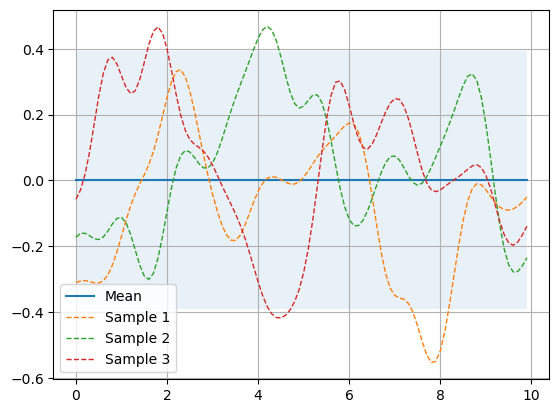

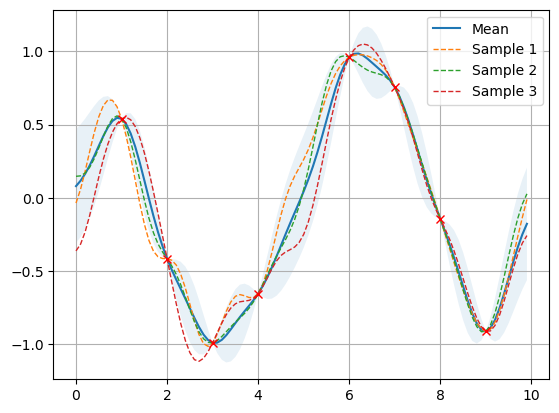

In [6]:
# 这段代码定义了一个函数y(x)，用来返回x的余弦值，并将其转换为列表格式。
# 接着，创建了一个GP对象gp，其中num_x_samples=100表示x的样本数为100个。调用gp的visualize()方法用于绘制高斯过程的初始状态。

# 然后，for循环，该循环用于执行5次随机观测和更新高斯过程，并在每次更新后调用gp的visualize()方法以可视化结果。

# 最后，定义一个观测序列obs_x，包含了8个不同的x值。将这些值作为字典传递给gp的update()方法，同时也将对应的y值计算得到，
# 并作为字典的值一同传递。随后，调用gp的visualize()方法以可视化更新后的高斯过程。

def y(x):
    x = np.asarray(x)
    return np.cos(x).tolist() 

gp = GP(num_x_samples=100)
gp.visualize()

# for _ in range(5):
#     obs_x = np.random.uniform(0, 10, size=2).tolist()
#     gp.update({"x": obs_x, "y": y(obs_x)})
#     gp.visualize()

obs_x = [1, 2, 3, 4, 6, 7, 8, 9]
gp.update({"x": obs_x, "y": y(obs_x)})
gp.visualize()